# This file is to collect all the new plots made for revision experiments
To dos:
 [ ] Class function to plot the intensity plots for ecad and occuldin intensity upon K4K8MO injection
 [ ] Plot the intensity vs time for ecad
 [ ] Plot the intensity vs time for occludin


In [1]:
#import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from datetime import datetime
today=datetime.today().strftime('%Y%m%d')


In [13]:
#class for creating a datastrcture from csv files in a directory with columns time, mean, treatment
class BinnedIntensityPlotter:
    def __init__(self, intensity_files, bin_edges, save_folder):
        self.intensity_files = intensity_files
        self.bin_edges = bin_edges
        self.save_folder = save_folder
        self.intensity_data = pd.DataFrame()
        self.binned_intensity_data = pd.DataFrame()
        self.controlindex =[]
        self.k4k8index = []
        self.binned_intensity_data["Time (hpf)"] = []

    def process_data(self):
        bin_centers = 0.5 * (self.bin_edges[1:] + self.bin_edges[:-1])
        self.binned_intensity_data["Time (hpf)"] = bin_centers
        bin_averages = np.zeros(len(bin_centers))

        for file in self.intensity_files:
            if file.find("2707") > -1:
                data = pd.read_csv(file)
                
                data["Label"] = "270723" + file.split("Pos")[1][0:3]
                data["Time"] = [(x - 1) * time1/60 / 60 + 4.5 for x in data[" "]]
                plt.plot(data["Time"], data["Mean"], label=file.split("Pos")[1][0:3], alpha=0.5)
                
                self.intensity_data = pd.concat([self.intensity_data, data])
                if file.find("Pos003")>-1 or file.find("Pos005") > -1:
                    treatment = "Control"
                elif file.find("Pos006")>-1 or file.find("Pos007")>-1 or file.find("Pos009") > -1:
                    treatment = "K4K8MO"
                for i in range(len(bin_centers)):
                    bin_averages[i] = np.mean(data["Mean"][(data["Time"] > self.bin_edges[i]) & (data["Time"] < self.bin_edges[i + 1])])
                self.binned_intensity_data["27072023_"+treatment +"_"+ file.split("Pos")[1][0:3]] = bin_averages
                if treatment == "Control":
                    self.controlindex.append("27072023_"+treatment +"_"+ file.split("Pos")[1][0:3])
                elif treatment == "K4K8MO":
                    self.k4k8index.append("27072023_"+treatment +"_"+ file.split("Pos")[1][0:3])
            else:
                data = pd.read_csv(file)
                print(f"file done {file.split('Pos')[1][0:3]}")
                data["Label"] = "200723" + file.split("Pos")[1][0:3]
                data["Time"] = [(x - 1) * time2/60 / 60 + 4.5 for x in data[" "]]
                plt.plot(data["Time"], data["Mean"], label=file.split("Pos")[1][0:3], alpha=0.5)
                
                self.intensity_data = pd.concat([self.intensity_data, data])
                if file.find("Control") > -1:
                    treatment = "Control"
                elif file.find("K4K8MO") > -1:
                    treatment = "K4K8MO"
                for i in range(len(bin_centers)):
                    bin_averages[i] = np.mean(data["Mean"][(data["Time"] > self.bin_edges[i]) & (data["Time"] < self.bin_edges[i + 1])])
                self.binned_intensity_data["20072023_"+treatment +"_"+ file.split("Pos")[1][0:3]] = bin_averages
                if treatment == "Control":
                    self.controlindex.append("20072023_"+treatment +"_"+ file.split("Pos")[1][0:3])
                elif treatment == "K4K8MO":
                    self.k4k8index.append("20072023_"+treatment +"_"+ file.split("Pos")[1][0:3])                        
    def plot_data(self):
        fig, ax = plt.subplots(figsize=(7, 5.3))
        plt.rcParams['figure.dpi'] = 100
        plt.rcParams['font.size'] = 24
        plt.rcParams['savefig.dpi'] = 300
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = 'Arial'
        plt.gca().spines['right'].set_color('none')
        plt.gca().spines['top'].set_color('none')
        ax.set_xlim(4.0, 20.0)
        ax.set_xticks(np.arange(4.0, 20.0, 0.5),minor=True)
        #ax.set_xticklabels(["4.5", "", "", "", "5.5", "", "", "", "6.5", "", "", "", "7.5", "", "", "", "8.5", ""])
        ax.set_yticks(np.arange(0, 470, 25), minor=True)
        #split self.binned_intensity_data into control and k4k8
        control_data = self.binned_intensity_data[self.controlindex]
        k4k8_data = self.binned_intensity_data[self.k4k8index]
        ax.plot(self.binned_intensity_data["Time (hpf)"], control_data.mean(axis=1), color="#83bb03", linewidth=2)
        #ax.scatter(self.binned_intensity_data["Time (hpf)"], control_data.mean(axis=1), color="#83bb03", s=4)
        ax.fill_between(self.binned_intensity_data["Time (hpf)"], control_data.mean(axis=1) - control_data.sem(axis=1), control_data.mean(axis=1) + control_data.sem(axis=1), color="#83bb03", alpha=0.3)
        ax.plot(self.binned_intensity_data["Time (hpf)"], k4k8_data.mean(axis=1), color="#ff7f00", linewidth=2)
        #ax.scatter(self.binned_intensity_data["Time (hpf)"], k4k8_data.mean(axis=1), color="#ff7f00", s=4)
        ax.fill_between(self.binned_intensity_data["Time (hpf)"], k4k8_data.mean(axis=1) - k4k8_data.sem(axis=1), k4k8_data.mean(axis=1) + k4k8_data.sem(axis=1), color="#ff7f00", alpha=0.3)
        #ax.set_xlabel("Time (hpf)", fontsize=24)
        #ax.set_ylabel("Ecad intensity (a.u.)", fontsize=24)
        
        plt.savefig(self.save_folder +today+ "_FigureRev_KeratinIntensity_nolab.png", dpi=300, bbox_inches='tight', transparent=True)
        plt.savefig(self.save_folder +today+ "_FigureRev_KeratinIntensity_nolab.pdf", dpi=300, bbox_inches='tight', transparent=True)
        plt.savefig(self.save_folder +today+ "FigureRev_KeratinIntensity_nolab.svg", dpi=300, bbox_inches='tight', transparent=True)        
        plt.show()

Enter the number of control embryos as a int


In [6]:
bin_edges = np.arange(4, 20, 0.25)
save_folder = "H:/PHD_data/Imaging_et_analysis/PaperFigures/FigureRev/"
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
ecadfolder1 ="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/07_Jul/27072023/"
time1=830.88#sec

ecadfolder2 ="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/07_Jul/20072023/"
time2=852.50#sec
intensity_files =glob(ecadfolder2 + "*/*.csv") + glob(ecadfolder1 + "*/*.csv")
plotter = BinnedIntensityPlotter(intensity_files, bin_edges, save_folder)
plotter.process_data()
plotter.plot_data()

TypeError: BinnedIntensityPlotter.__init__() missing 2 required positional arguments: 'treatment_map' and 'timeframe'

In [15]:
from BinnedPlotter import BinnedIntensityPlotter

#plotter = BinnedIntensityPlotter(intensity_files, bin_edges, save_folder, treatment_map)
#plotter.process_data()
occludinfolder1 ="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/02_Feb/09022023_OccK4K8MO"
occludinfolder2="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2025/05_Mai/06052025_TgOccGFPK4K8MOonecell"


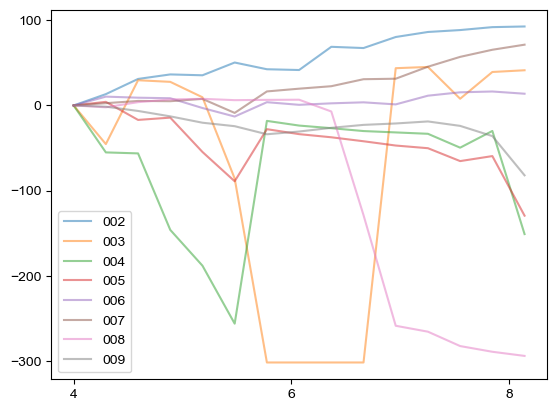

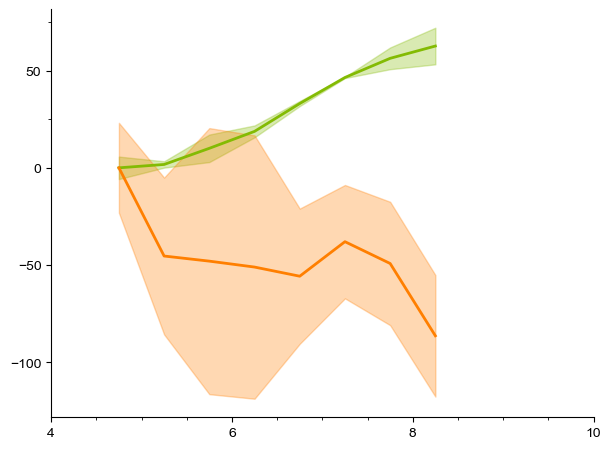

In [4]:
treatmap2= {
    "Control": [2,7],
    "K4K8MO": [3, 4, 5,6,8,9]
}
bin_edges = np.arange(4.5, 12, 0.5)
savetemp="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2025/05_Mai/06052025_TgOccGFPK4K8MOonecell/revplots"
occplotter=BinnedIntensityPlotter(glob(occludinfolder2 + "/P*/*.csv"), bin_edges, savetemp, treatmap2,1064.79)
ocbi=occplotter.process_data()
occplotter.plot_data()

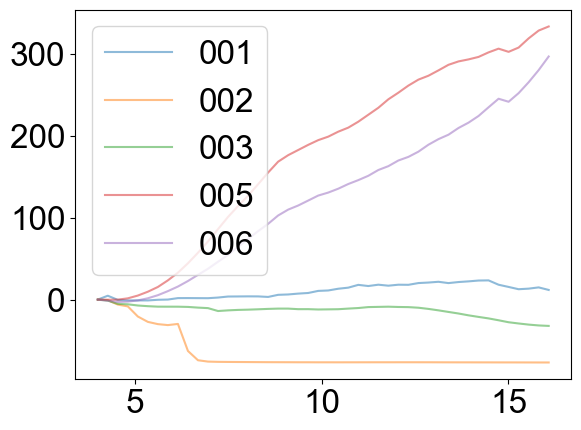

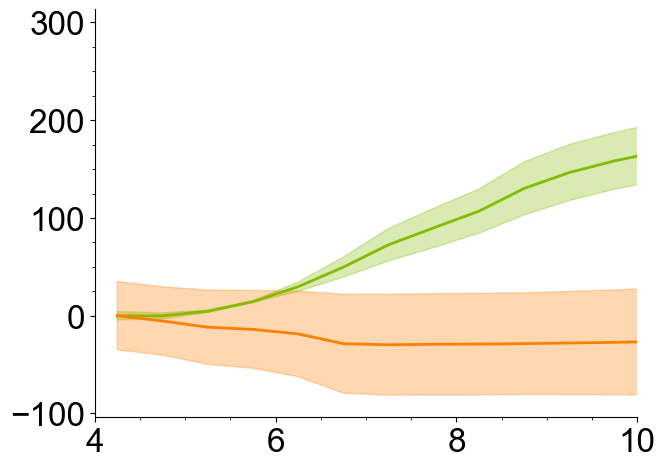

In [5]:
treatmap3={
    "Control": [5,6],
    "K4K8MO": [1,2,3]
}
bin_edges = np.arange(4, 15, 0.5)
timeframe090223=966.34
savetemp="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/02_Feb/09022023_OccK4K8MO/revplots"
if not os.path.exists(savetemp):
    os.makedirs(savetemp)
occplotter2=BinnedIntensityPlotter(glob(occludinfolder1 + "/P*/*.csv"), bin_edges, savetemp, treatmap3, timeframe090223)

occplotter2.process_data()
occplotter2.plot_data()

In [6]:
files=glob(occludinfolder2+"\*\*csv")
for file in files:
    data = pd.read_csv(file)
    date= file.split("/")[-1].split("_")[0]
    print(f"file done {date}")


file done 06052025
file done 06052025
file done 06052025
file done 06052025
file done 06052025
file done 06052025
file done 06052025
file done 06052025
file done 06052025


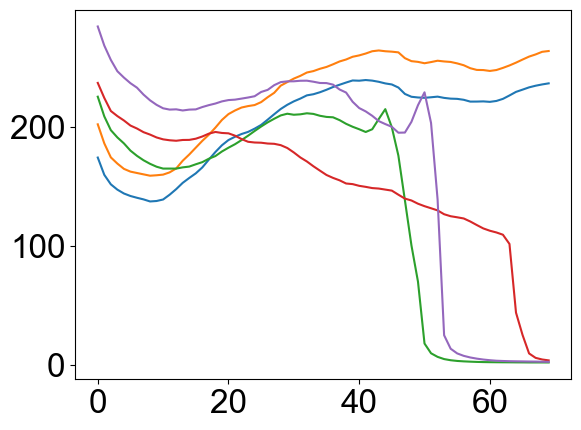

In [7]:
#test
testfolder="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/07_Jul/27072023/"
testfiles=glob(testfolder+"*/*.csv")
timeframe=830.88 #sec
for i in range(len(testfiles)):
    pd.read_csv(testfiles[i])["Mean"].plot()


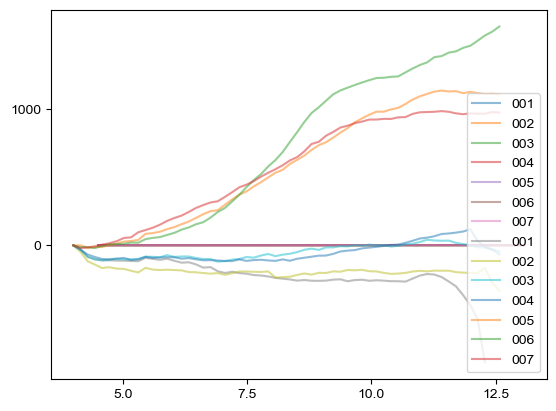

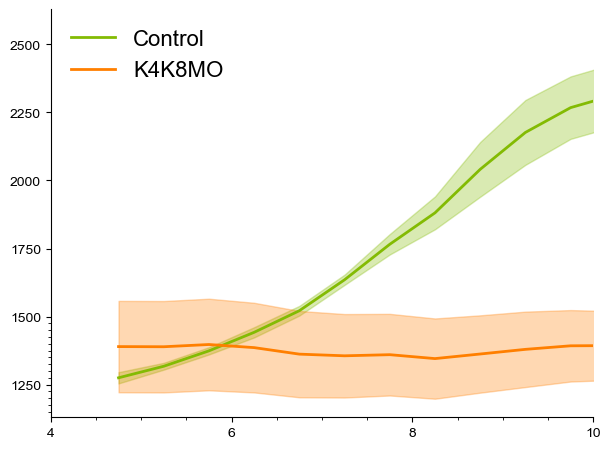

In [2]:
from BinnedPlotter import BinnedIntensityPlotter
plakofolder="H:/PHD_data/Imaging_et_analysis/Stellaris/2025/07_Juli/23072025_Plakoglobin/"
plakofiles=glob(plakofolder+"*/*.csv")
timeframeplako=523.18 #secs
bin_edges = np.arange(4.5, 12, 0.5)
for i in range(len(plakofiles)):
    data = pd.read_csv(plakofiles[i])
    data["Time"] = [(x - 1) * timeframeplako/60 / 60 + 4.5 for x in data[" "]]
    plt.plot(data["Time"], data["Mean"]/data["Mean"][0], label=plakofiles[i].split("Pos")[1][0:3], alpha=0.5)
    plt.legend()
treatmapplako={
    "Control": [5,6,7],
    "K4K8MO": [1,2,3,4]
}
plakoplotter=BinnedIntensityPlotter(glob(plakofolder + "/P*/*.csv"), bin_edges, plakofolder, treatmapplako, timeframeplako)
plakodf=plakoplotter.process_data()
plakoplotter.plot_data()
